In [1]:
# Chunk 1: Setup & Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# File paths
data_path = r"C:\Users\azams\analyticsDayF25\data\masterfinalmerge.csv"
results_path = Path(r"C:\Users\azams\analyticsDayF25\results")
results_path.mkdir(exist_ok=True)

# Load data
df = pd.read_csv(data_path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     241 non-null    int64  
 1   city                                     241 non-null    object 
 2   dep_pm2.5                                241 non-null    float64
 3   soc_total_population                     241 non-null    int64  
 4   soc_population_density                   241 non-null    float64
 5   soc_median_household_income_usd          241 non-null    int64  
 6   soc_poverty_rate_pct                     241 non-null    float64
 7   soc_education_hs_degree_plus_pct         241 non-null    float64
 8   soc_education_bachelors_degree_plus_pct  241 non-null    float64
 9   soc_labor_force_participation_rate_pct   241 non-null    float64
 10  soc_unemployment_rate_pct                241 non-n

,year,city,dep_pm2.5,soc_total_population,soc_population_density,soc_median_household_income_usd,soc_poverty_rate_pct,soc_education_hs_degree_plus_pct,soc_education_bachelors_degree_plus_pct,soc_labor_force_participation_rate_pct,...,ind_manufacturing_establishments,ind_industrial_emissions_nox_tons,ind_industrial_emissions_so2_tons,ind_industrial_emissions_vocs_tons,trans_annual_vmt_million_miles,trans_traffic_density_index,env_annual_avg_temperature_c,env_annual_avg_wind_speed_m/s,env_annual_total_precipitation_mm,env_green_space_area_pct_of_city
0,2024,Atlanta-Sandy Springs-Rosswell GA,4.67,6389528,763.1,88120,7.55,86.35,58.15,7.68,...,5632.7,3014.18,2723.23,2933.86,100511.9,2.04,19.5,3.4,1295.0,15.2
1,2010,Atlanta-Sandy Springs-Roswell GA,9.29,5288302,631.4,53182,11.37,84.12,53.36,7.83,...,6000.0,5000.00,4500.00,4000.00,95000.0,1.95,18.1,3.4,1270.0,14.5
2,2011,Atlanta-Sandy Springs-Roswell GA,7.72,5365726,640.6,52639,12.78,83.76,53.39,7.89,...,5981.5,4918.43,4460.52,3985.67,95880.5,1.96,18.3,3.3,1305.0,14.5
3,2012,Atlanta-Sandy Springs-Roswell GA,7.08,5442113,649.7,54628,13.18,84.20,54.42,7.86,...,5937.2,4856.71,4389.11,3928.31,96711.2,1.97,18.5,3.5,1190.0,14.6
4,2013,Atlanta-Sandy Springs-Roswell GA,5.47,5524693,659.6,55733,11.98,84.54,54.21,7.90,...,5861.9,4612.02,4166.75,3799.19,97604.1,1.98,18.2,3.4,1250.0,14.6


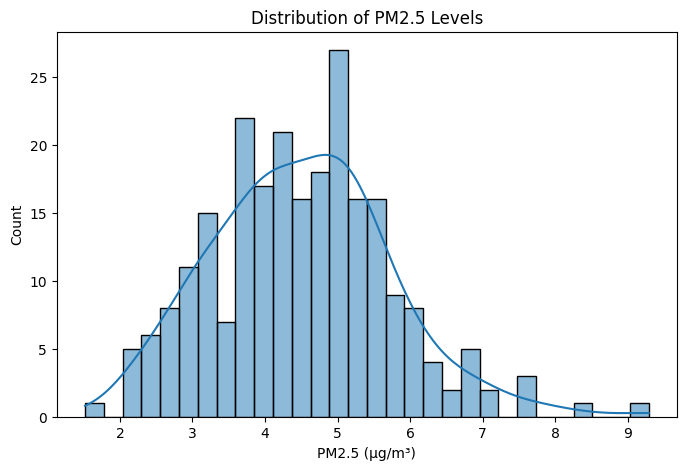

,year,dep_pm2.5,soc_total_population,soc_population_density,soc_median_household_income_usd,soc_poverty_rate_pct,soc_education_hs_degree_plus_pct,soc_education_bachelors_degree_plus_pct,soc_labor_force_participation_rate_pct,soc_unemployment_rate_pct,ind_manufacturing_establishments,ind_industrial_emissions_nox_tons,ind_industrial_emissions_so2_tons,ind_industrial_emissions_vocs_tons,trans_annual_vmt_million_miles,trans_traffic_density_index,env_annual_avg_temperature_c,env_annual_avg_wind_speed_m/s,env_annual_total_precipitation_mm,env_green_space_area_pct_of_city
count,241.000000,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2017.526971,4.508423,6.753092e+06,973.920871,74575.489627,9.026141,84.544481,55.763195,6.852739,7.512905,10085.537759,6518.501660,5841.895228,5471.656390,99399.992531,2.232697,15.533195,3.532780,846.535270,14.340249
std,4.628748,1.235574,4.339750e+06,570.781312,16904.776039,2.361279,3.632839,4.890452,0.599082,2.491284,7347.150885,4675.602352,4141.180853,3865.989231,31918.018840,0.593115,4.800336,0.613633,334.355611,3.049931
min,2010.000000,1.520000,2.317600e+06,288.600000,46700.000000,4.610000,74.680000,46.020000,5.480000,3.640000,3148.900000,1292.000000,1033.470000,1051.870000,52874.800000,1.490000,6.500000,2.400000,180.000000,8.100000
25%,2014.000000,3.690000,4.034248e+06,622.500000,60564.000000,7.340000,82.230000,52.280000,6.420000,5.590000,4785.600000,2961.020000,2723.230000,2521.780000,75000.000000,1.770000,11.400000,3.000000,590.000000,11.900000
50%,2018.000000,4.470000,5.761482e+06,797.500000,71742.000000,8.500000,84.730000,54.780000,6.770000,6.950000,8583.500000,5010.510000,4672.630000,4479.130000,97604.100000,2.020000,15.000000,3.600000,910.000000,14.800000
75%,2022.000000,5.220000,7.340118e+06,1193.300000,86860.000000,10.970000,87.290000,59.220000,7.380000,8.970000,11000.000000,8559.390000,7316.320000,6932.950000,114505.600000,2.580000,19.200000,3.900000,1090.000000,16.600000
max,2025.000000,9.290000,2.032088e+07,2753.000000,124469.000000,14.890000,91.020000,67.730000,8.140000,15.730000,30000.000000,22000.000000,19000.000000,17000.000000,182205.700000,3.860000,25.000000,4.900000,1380.000000,19.700000


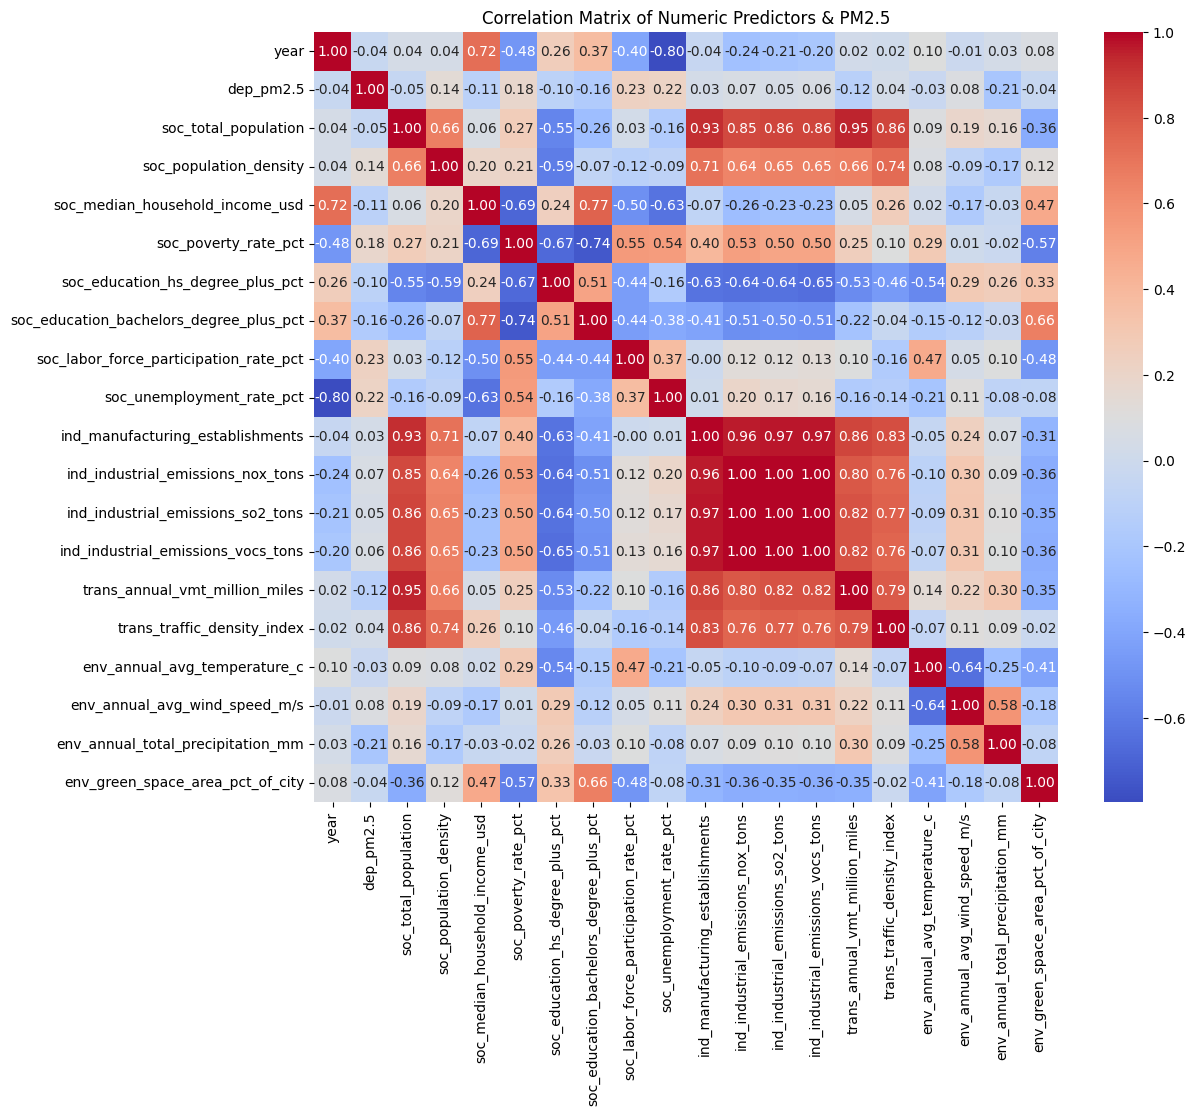

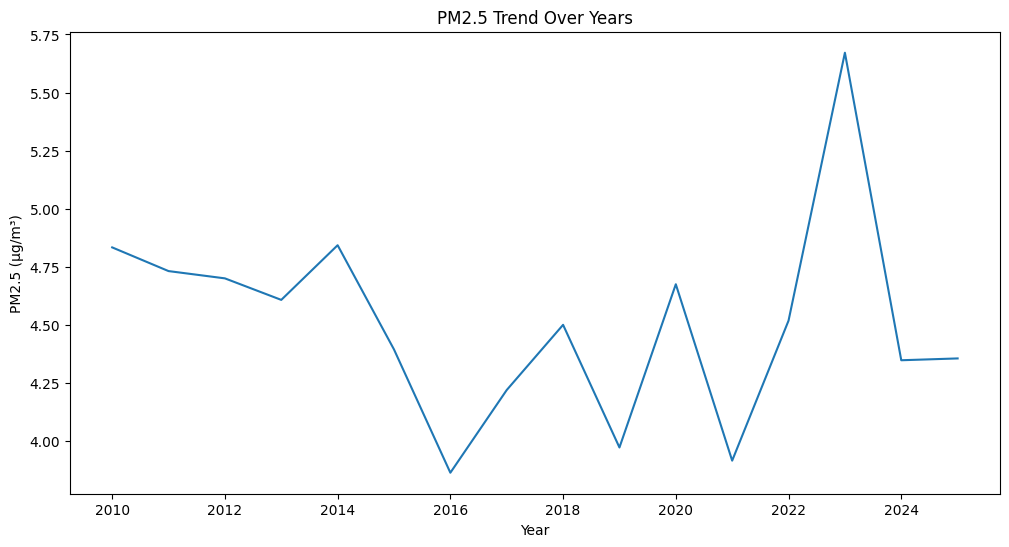

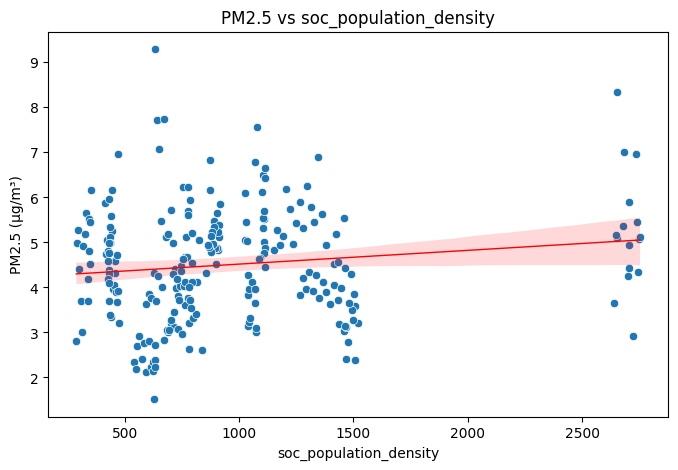

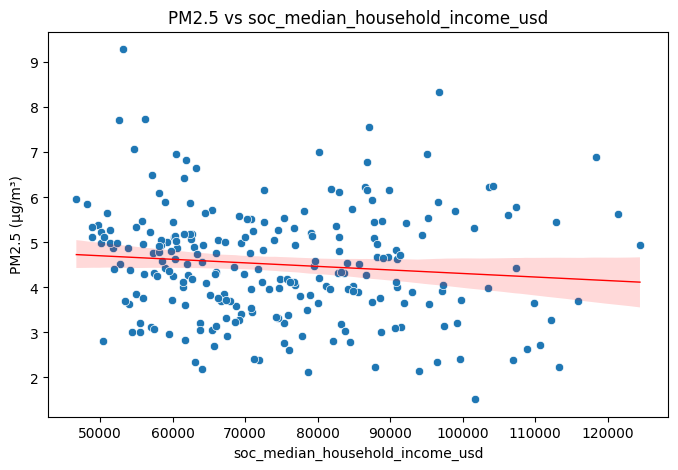

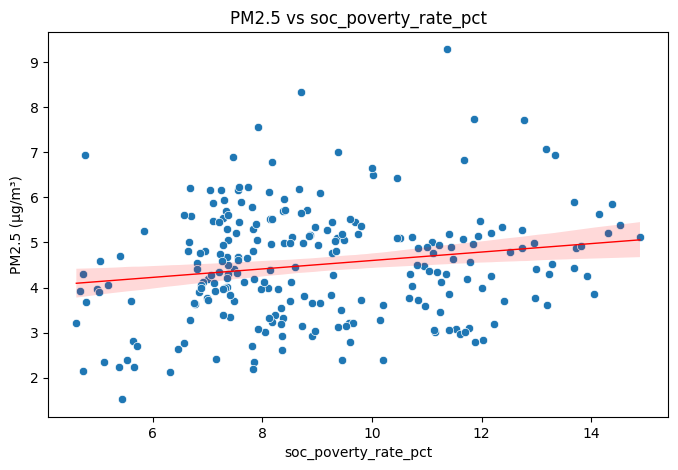

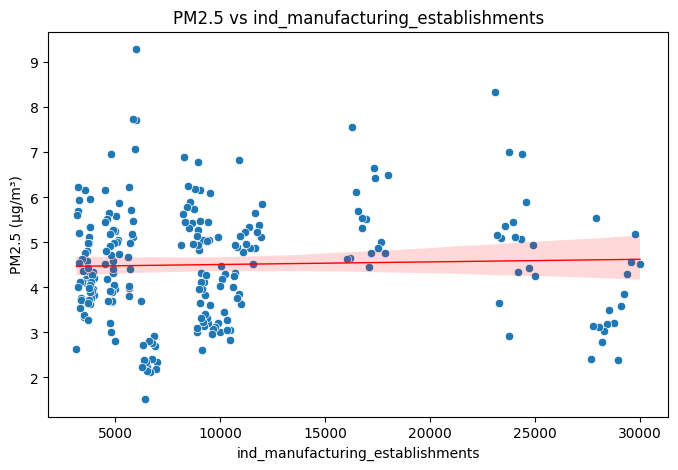

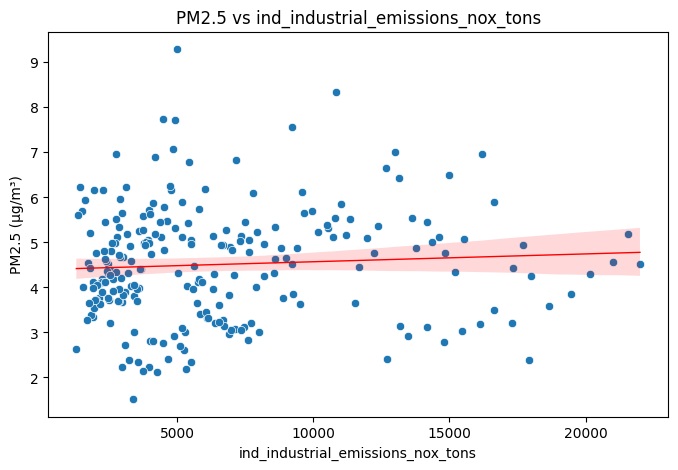

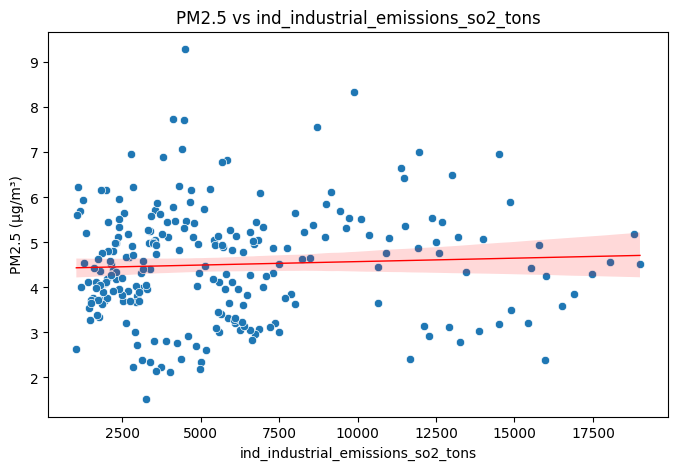

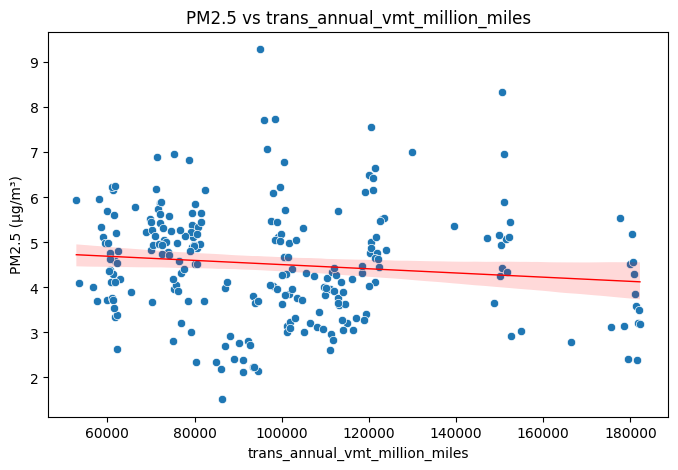

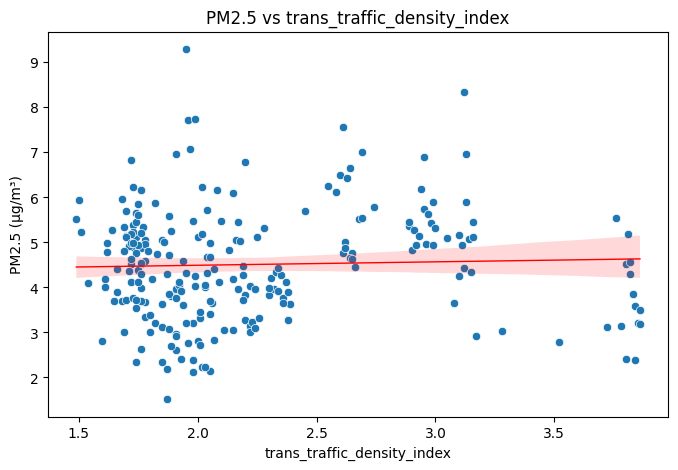

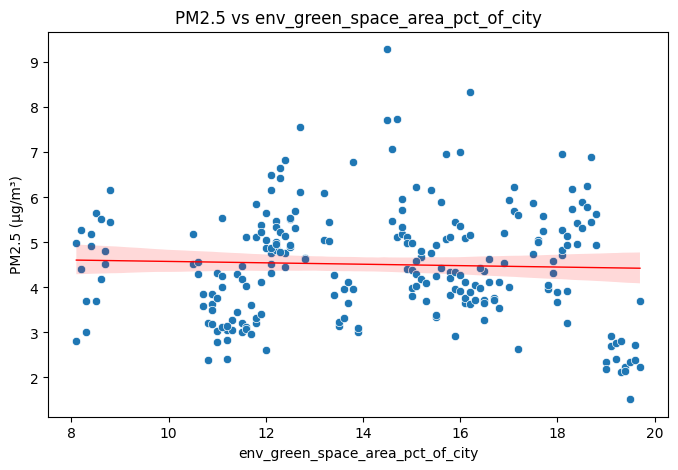

In [5]:
# Chunk 2: Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribution of PM2.5
plt.figure(figsize=(8,5))
sns.histplot(df['dep_pm2.5'], bins=30, kde=True)
plt.title("Distribution of PM2.5 Levels")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Count")
plt.savefig(results_path / "pm25_distribution.png")
plt.show()

# Summary statistics
display(df.describe())

# Correlation matrix (numeric columns only)
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Predictors & PM2.5")
plt.savefig(results_path / "correlation_matrix.png")
plt.show()

# PM2.5 over years
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='dep_pm2.5', errorbar=None)
plt.title("PM2.5 Trend Over Years")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.savefig(results_path / "pm25_trend_year.png")
plt.show()

# Scatterplots for key predictors vs PM2.5
key_predictors = [
    'soc_population_density', 
    'soc_median_household_income_usd',
    'soc_poverty_rate_pct',
    'ind_manufacturing_establishments',
    'ind_industrial_emissions_nox_tons',
    'ind_industrial_emissions_so2_tons',
    'trans_annual_vmt_million_miles',
    'trans_traffic_density_index',
    'env_green_space_area_pct_of_city'
]

for col in key_predictors:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=col, y='dep_pm2.5')
    sns.regplot(data=df, x=col, y='dep_pm2.5', scatter=False, color='red', line_kws={'linewidth':1})
    plt.title(f"PM2.5 vs {col}")
    plt.xlabel(col)
    plt.ylabel("PM2.5 (µg/m³)")
    plt.savefig(results_path / f"pm25_vs_{col}.png")
    plt.show()

In [6]:
# Chunk 3: Regression Modeling & Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define predictors and target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('dep_pm2.5')  # remove target
X = df[numeric_cols]
y = df['dep_pm2.5']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 1. Linear Regression
# -----------------------------
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

print("Linear Regression Performance:")
print(f"Train R^2: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R^2: {r2_score(y_test, y_pred_test):.3f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.3f}")

# Coefficients
coef_df = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
display(coef_df)

# -----------------------------
# 2. Random Forest Regression
# -----------------------------
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Test R^2: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")

# Feature importance
feat_imp = pd.DataFrame({
    'Predictor': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
display(feat_imp)

# -----------------------------
# 3. Optional: Interactions / Non-linear Effects
# -----------------------------
# Example: include interaction term between traffic density and green space
X_interact = X.copy()
X_interact['traffic_x_green'] = X['trans_traffic_density_index'] * X['env_green_space_area_pct_of_city']

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interact, y, test_size=0.2, random_state=42)
linreg_int = LinearRegression()
linreg_int.fit(X_train_int, y_train_int)
y_pred_int = linreg_int.predict(X_test_int)

print("\nLinear Regression with Interaction (Traffic x Green Space):")
print(f"Test R^2: {r2_score(y_test_int, y_pred_int):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test_int, y_pred_int)):.3f}")

Linear Regression Performance:
Train R^2: 0.471
Test R^2: 0.282
Train RMSE: 0.900
Test RMSE: 1.012


,Predictor,Coefficient
14,trans_traffic_density_index,1.391651e+00
16,env_annual_avg_wind_speed_m/s,1.354635e+00
7,soc_labor_force_participation_rate_pct,1.215504e+00
5,soc_education_hs_degree_plus_pct,3.337574e-01
15,env_annual_avg_temperature_c,2.963391e-01
18,env_green_space_area_pct_of_city,2.745091e-01
8,soc_unemployment_rate_pct,2.091528e-01
0,year,1.541711e-01
4,soc_poverty_rate_pct,-1.062789e-01
6,soc_education_bachelors_degree_plus_pct,-7.419517e-02



Random Forest Performance:
Test R^2: 0.293
Test RMSE: 1.005


,Predictor,Importance
18,env_green_space_area_pct_of_city,0.179531
8,soc_unemployment_rate_pct,0.108550
17,env_annual_total_precipitation_mm,0.100624
7,soc_labor_force_participation_rate_pct,0.098933
5,soc_education_hs_degree_plus_pct,0.073695
1,soc_total_population,0.053477
15,env_annual_avg_temperature_c,0.045991
13,trans_annual_vmt_million_miles,0.043622
3,soc_median_household_income_usd,0.041709
2,soc_population_density,0.037617



Linear Regression with Interaction (Traffic x Green Space):
Test R^2: 0.278
Test RMSE: 1.016


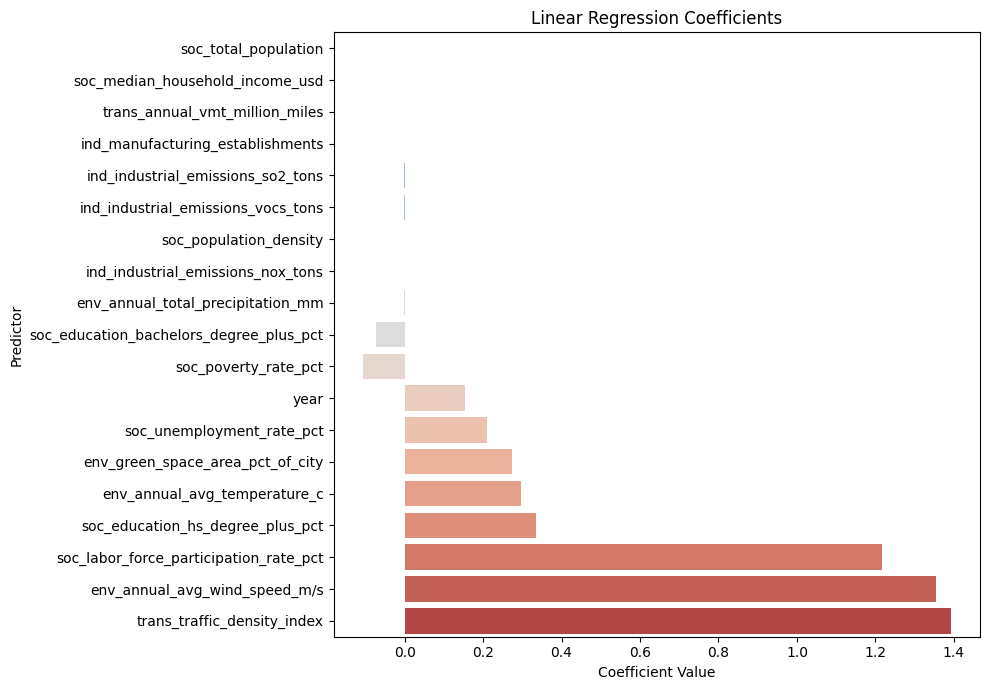

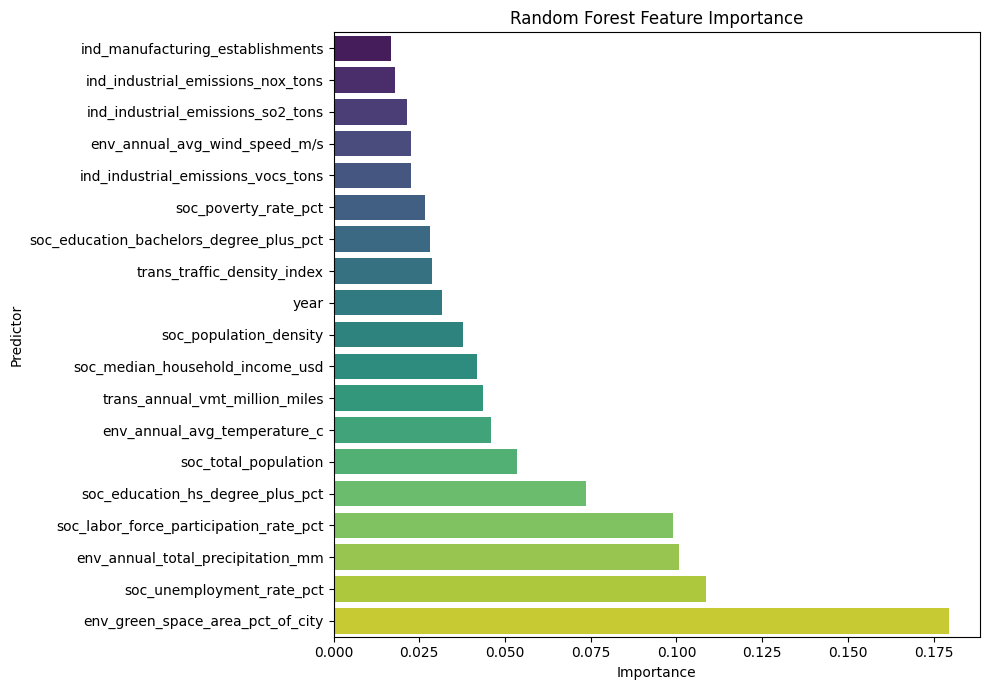

Coefficient for Traffic x Green Space Interaction: 0.081


In [10]:
# Chunk 4: Regression & Random Forest Visualization (Polished)

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Ensure results folder exists
results_path = Path("results")
results_path.mkdir(exist_ok=True, parents=True)

# ----- 1. Linear Regression Coefficients -----
coef_df = pd.DataFrame({
    "Predictor": X.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=True)  # sort by absolute value ascending for better vertical barplot

plt.figure(figsize=(10,7))
sns.barplot(
    x="Coefficient", 
    y="Predictor", 
    data=coef_df, 
    palette=sns.color_palette("coolwarm", len(coef_df)), 
    dodge=False, 
    hue="Predictor", 
    legend=False
)
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictor")
plt.tight_layout()
plt.savefig(results_path / "linear_regression_coefficients.png")
plt.show()

# ----- 2. Random Forest Feature Importance -----
feat_imp = pd.DataFrame({
    "Predictor": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=True)  # ascending for vertical barplot

plt.figure(figsize=(10,7))
sns.barplot(
    x="Importance", 
    y="Predictor", 
    data=feat_imp, 
    palette=sns.color_palette("viridis", len(feat_imp)), 
    dodge=False, 
    hue="Predictor", 
    legend=False
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Predictor")
plt.tight_layout()
plt.savefig(results_path / "random_forest_feature_importance.png")
plt.show()

# ----- 3. Interaction Term Effect (Traffic x Green Space) -----
# Get coefficient for interaction term
interaction_coef = linreg_int.coef_[-1]  # last coefficient is the interaction
print(f"Coefficient for Traffic x Green Space Interaction: {interaction_coef:.3f}")

                            OLS Regression Results                            
Dep. Variable:              dep_pm2.5   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     8.072
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.07e-15
Time:                        16:57:23   Log-Likelihood:                -252.22
No. Observations:                 192   AIC:                             544.4
Df Residuals:                     172   BIC:                             609.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

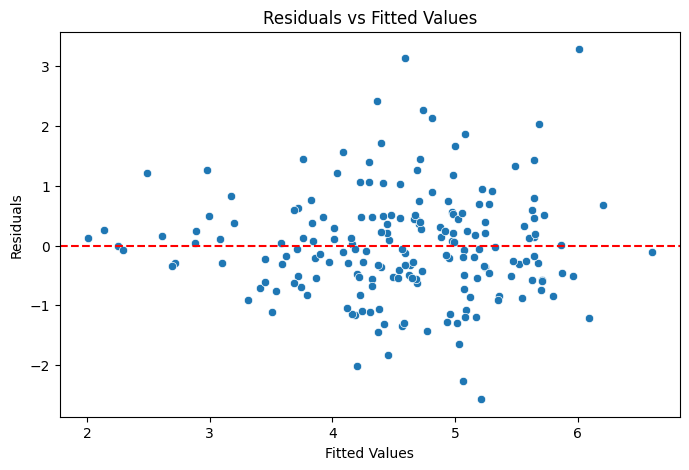

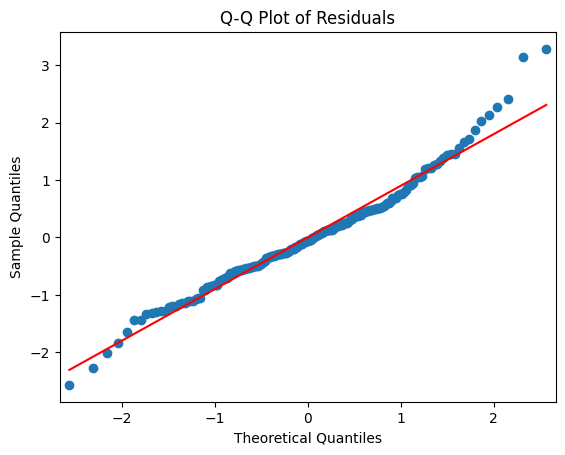

In [14]:
# Chunk 5: Linear Regression Diagnostics

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit model with statsmodels for detailed diagnostics
X_sm = sm.add_constant(X_train)  # add intercept
lr_sm = sm.OLS(y_train, X_sm).fit()

# 1. Summary table
print(lr_sm.summary())

# 2. Residuals vs Fitted
residuals = y_train - lr_sm.fittedvalues
plt.figure(figsize=(8,5))
sns.scatterplot(x=lr_sm.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# 3. Q-Q plot for normality of residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

<Figure size 1200x800 with 0 Axes>

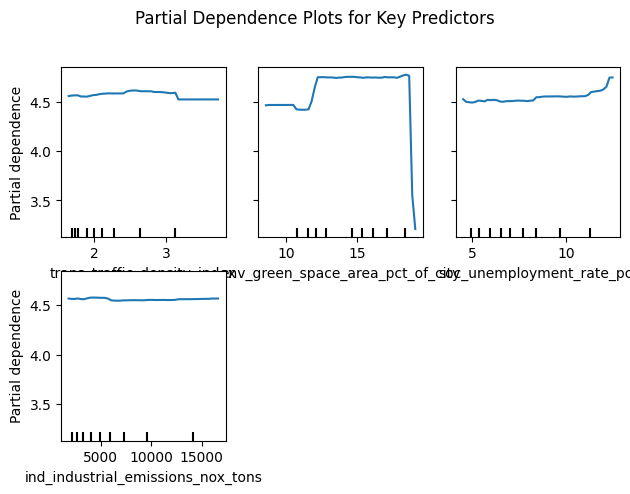

In [16]:
# Chunk 6: Random Forest Partial Dependence (Updated)

from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    'trans_traffic_density_index', 
    'env_green_space_area_pct_of_city', 
    'soc_unemployment_rate_pct', 
    'ind_industrial_emissions_nox_tons'
]

plt.figure(figsize=(12,8))
PartialDependenceDisplay.from_estimator(
    rf, 
    X_train, 
    features=features_to_plot, 
    grid_resolution=50
)
plt.suptitle("Partial Dependence Plots for Key Predictors", y=1.02)
plt.tight_layout()
plt.show()

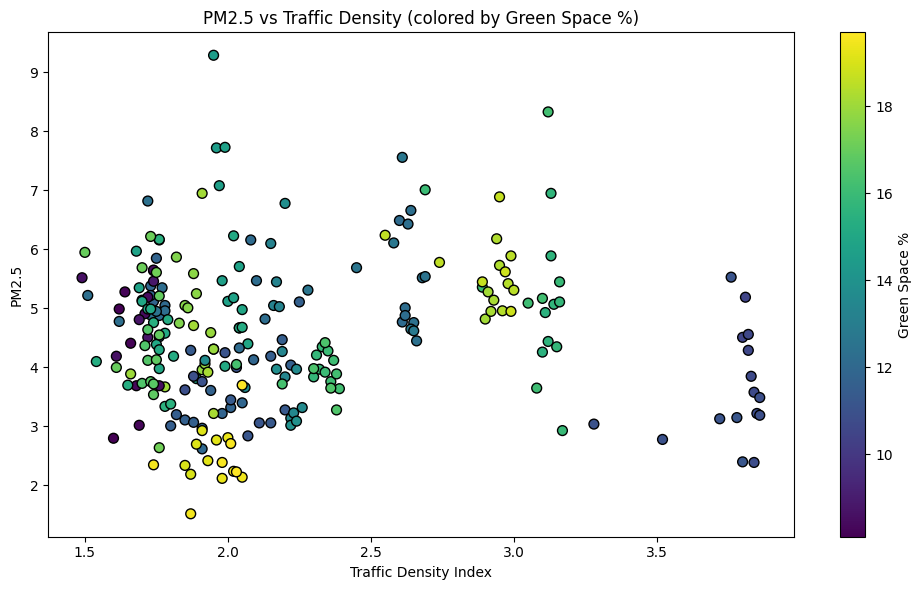

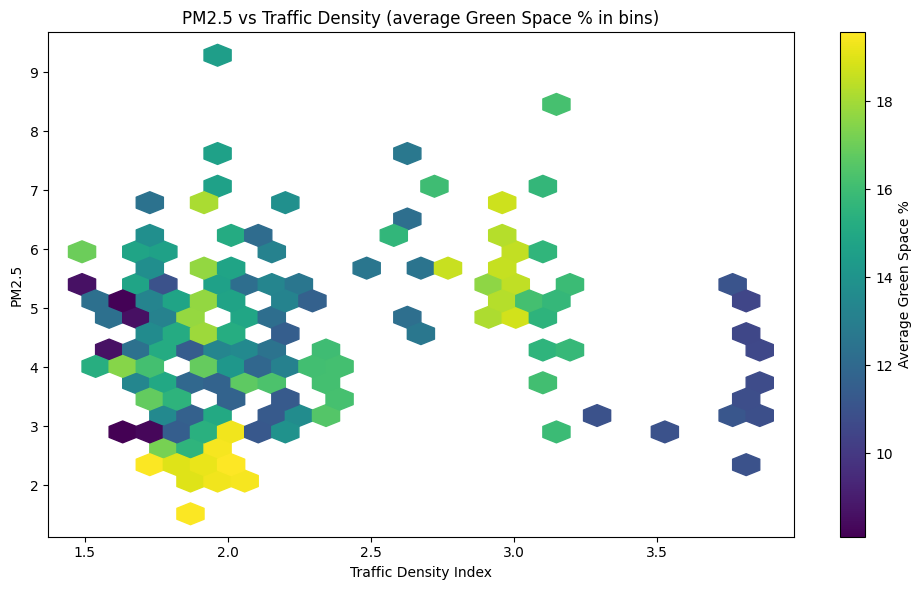

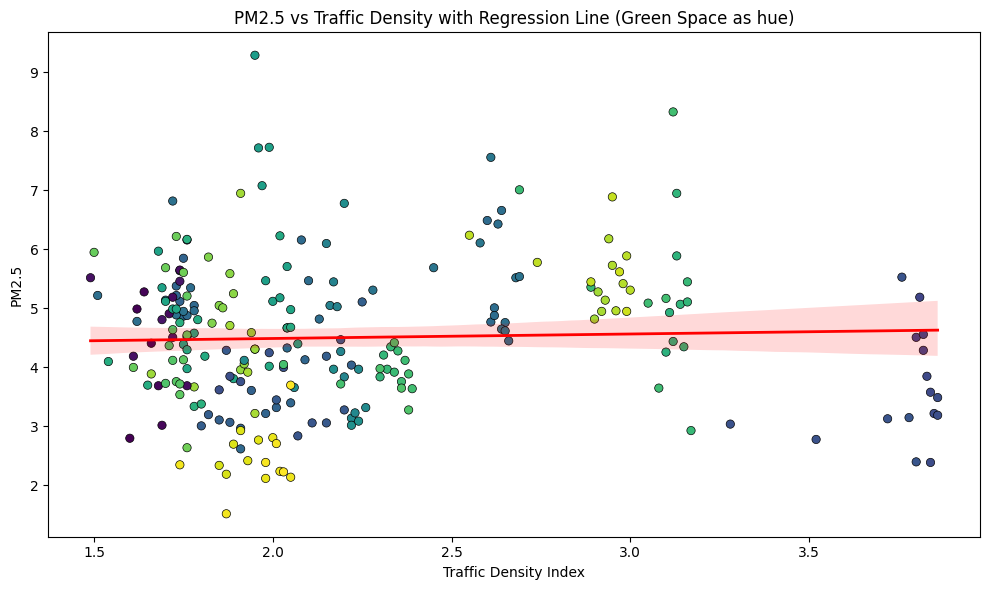

In [18]:
# Chunk 7: Interaction Visualization (Traffic x Green Space)

import matplotlib.pyplot as plt
import seaborn as sns

# Define variables
traffic = X['trans_traffic_density_index']
green_space = X['env_green_space_area_pct_of_city']
pm25 = y  # dep_pm2.5

# ----- 1. Scatter plot with color representing Green Space -----
plt.figure(figsize=(10,6))
sc = plt.scatter(traffic, pm25, c=green_space, cmap='viridis', s=50, edgecolor='k')
plt.xlabel("Traffic Density Index")
plt.ylabel("PM2.5")
plt.title("PM2.5 vs Traffic Density (colored by Green Space %)")
plt.colorbar(sc, label="Green Space %")
plt.tight_layout()
plt.savefig(results_path / "interaction_traffic_green_space.png")
plt.show()

# ----- 2. Optional: 2D Density / Hexbin plot -----
plt.figure(figsize=(10,6))
hb = plt.hexbin(traffic, pm25, C=green_space, gridsize=25, cmap='viridis', reduce_C_function=np.mean)
plt.xlabel("Traffic Density Index")
plt.ylabel("PM2.5")
plt.title("PM2.5 vs Traffic Density (average Green Space % in bins)")
plt.colorbar(hb, label="Average Green Space %")
plt.tight_layout()
plt.savefig(results_path / "interaction_traffic_green_space_hexbin.png")
plt.show()

# ----- 3. Optional: Regression plot with hue -----
plt.figure(figsize=(10,6))
sns.scatterplot(x=traffic, y=pm25, hue=green_space, palette='viridis', edgecolor='k', legend=False)
sns.regplot(x=traffic, y=pm25, scatter=False, color='red', line_kws={"linewidth":2})
plt.xlabel("Traffic Density Index")
plt.ylabel("PM2.5")
plt.title("PM2.5 vs Traffic Density with Regression Line (Green Space as hue)")
plt.tight_layout()
plt.savefig(results_path / "interaction_traffic_green_space_regression.png")
plt.show()

In [19]:
# Chunk 8: Summary Table for Research Questions

summary_df = pd.DataFrame({
    'Predictor': coef_df['Predictor'],
    'LinearReg_Coefficient': coef_df['Coefficient'].values,
    'RandomForest_Importance': feat_imp['Importance'].values
}).sort_values(by='RandomForest_Importance', ascending=False)

display(summary_df)

# Optional: highlight top 5 predictors for clarity
top5 = summary_df.head(5)
print("Top 5 predictors influencing PM2.5 (combined):")
display(top5)

,Predictor,LinearReg_Coefficient,RandomForest_Importance
14,trans_traffic_density_index,1.391651e+00,0.179531
16,env_annual_avg_wind_speed_m/s,1.354635e+00,0.108550
7,soc_labor_force_participation_rate_pct,1.215504e+00,0.100624
5,soc_education_hs_degree_plus_pct,3.337574e-01,0.098933
15,env_annual_avg_temperature_c,2.963391e-01,0.073695
18,env_green_space_area_pct_of_city,2.745091e-01,0.053477
8,soc_unemployment_rate_pct,2.091528e-01,0.045991
0,year,1.541711e-01,0.043622
4,soc_poverty_rate_pct,-1.062789e-01,0.041709
6,soc_education_bachelors_degree_plus_pct,-7.419517e-02,0.037617


Top 5 predictors influencing PM2.5 (combined):


,Predictor,LinearReg_Coefficient,RandomForest_Importance
14,trans_traffic_density_index,1.391651,0.179531
16,env_annual_avg_wind_speed_m/s,1.354635,0.108550
7,soc_labor_force_participation_rate_pct,1.215504,0.100624
5,soc_education_hs_degree_plus_pct,0.333757,0.098933
15,env_annual_avg_temperature_c,0.296339,0.073695
